### **Name: Rabia Akhtar**

### **Project: Hotel Booking EDA**

## **Import the necessary libraries**

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

## **Load the dataset**

In [56]:
dataset = pd.read_csv('/content/hotel_booking.csv')

## **Understand the data**

In [58]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [59]:
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [60]:
dataset.shape

(119390, 36)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Dropping the missing or null values**

In [63]:
print(dataset.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

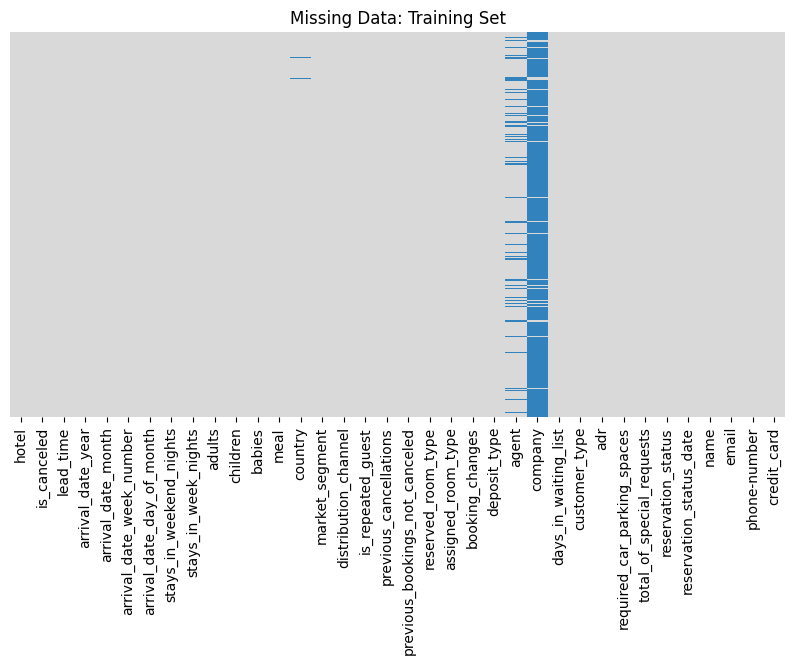

In [64]:
# Heatmap
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [65]:
# Remove company feature
dataset.drop('company', axis = 1, inplace = True)

In [66]:
# Fill missing values in the "country" column with the median
country_median = dataset["country"].mode()[0]
dataset["country"].fillna(country_median, inplace=True)

# Fill missing values in the "agent" column with the median
agent_median = dataset["agent"].median()
dataset["agent"].fillna(agent_median, inplace=True)

In [67]:
# Remove rows with missing data
dataset.dropna(inplace = True)

In [68]:
# Remove rows with duplicates
dataset.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [69]:
print(dataset.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [71]:
import pandas as pd

# Create a new 'arrival_date' feature by combining the arrival date components
dataset['arrival_date'] = pd.to_datetime(dataset['arrival_date_year'].astype(str) + '-' +
                                      dataset['arrival_date_month'] + '-' +
                                      dataset['arrival_date_day_of_month'].astype(str))



In [74]:
# Save the modified DataFrame to a new CSV file
dataset.to_csv('modified_dataset.csv', index=False)

In [73]:
# Create a new 'total_guests' feature by combining the number of adults, children, and babies
dataset['total_guests'] = dataset['adults'] + dataset['children'].fillna(0) + dataset['babies']


# Save the modified DataFrame to a new CSV file if needed
dataset.to_csv('modified_dataset_with_new_features.csv', index=False)

In [76]:
# Load the modified dataset
data_modified = pd.read_csv('/content/modified_dataset_with_new_features.csv')

In [77]:
# Remove unnecessary feature
data_modified.drop(['adults', 'children', 'babies'], axis = 1, inplace = True)

In [78]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   meal                            119386 non-null  object 
 10  country                         119386 non-null  object 
 11  market_segment                  119386 non-null  object 
 12  distribution_cha

## **Visualize Data to Identify Outliers**

### **Box Plot**

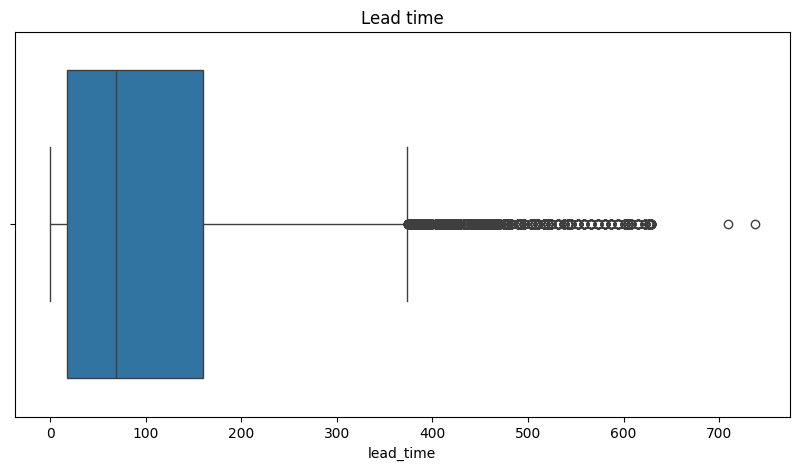

In [83]:
sns.boxplot(x=dataset['lead_time'])
plt.title('Lead time')
plt.show()

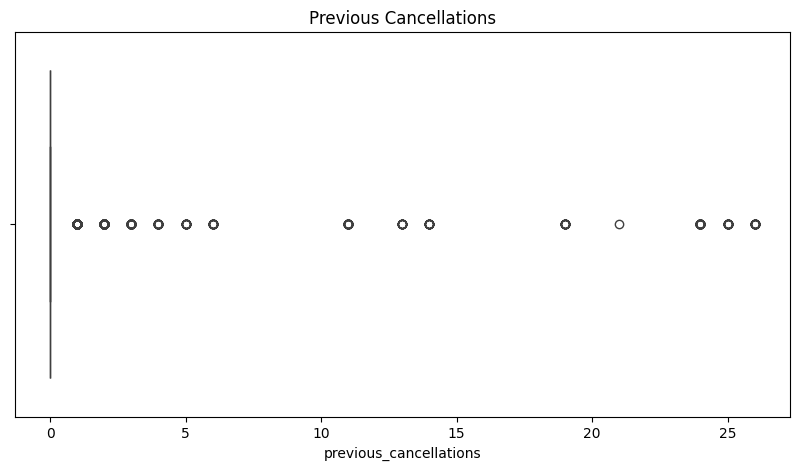

In [88]:
sns.boxplot(x=dataset['previous_cancellations'])
plt.title('Previous Cancellations')
plt.show()

### **Remove Outliers**

In [92]:
def whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return lower_whisker, upper_whisker

# Convert columns to numeric values
for i in ['lead_time','previous_cancellations']:
    dataset[i] = pd.to_numeric(dataset[i], errors='coerce')

    # Apply whisker calculations
    lw, uw = whisker(dataset[i])

    # Replace outliers
    dataset[i] = np.where(dataset[i] < lw, lw, dataset[i])
    dataset[i] = np.where(dataset[i] > uw, uw, dataset[i])

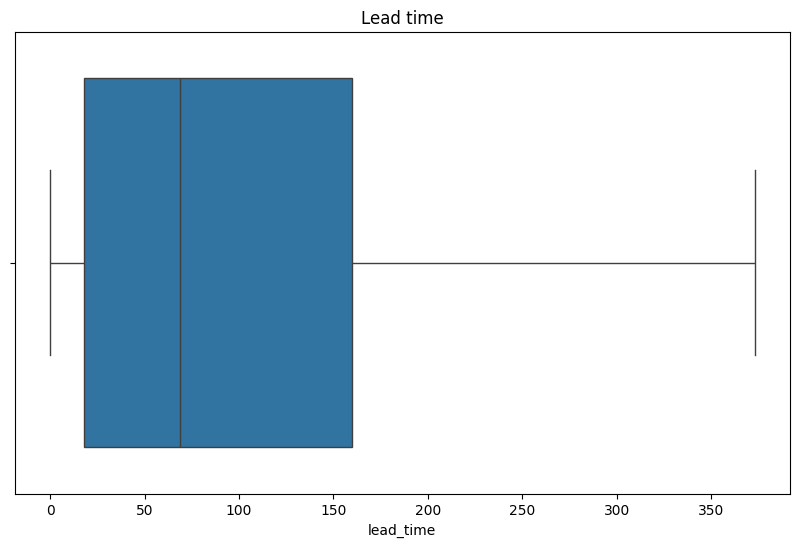

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(x=dataset['lead_time'])
plt.title('Lead time')
plt.show()

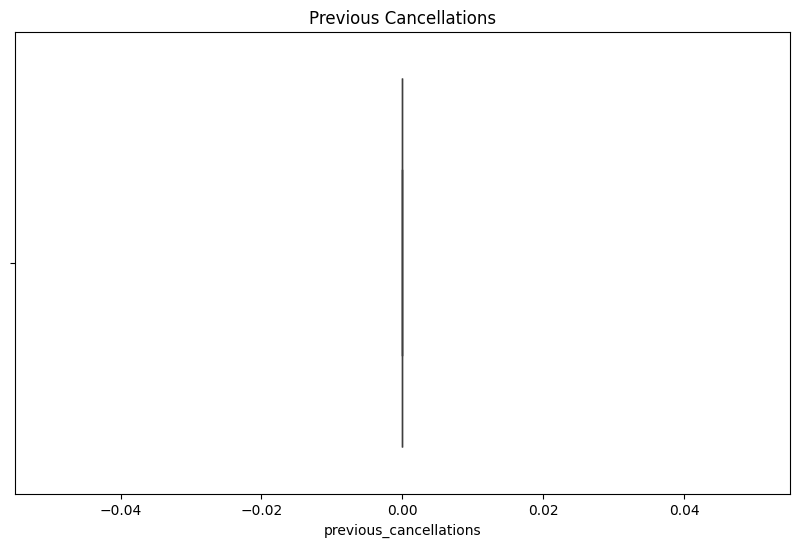

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x=dataset['previous_cancellations'])
plt.title('Previous Cancellations')
plt.show()

## **Visualization Graphs**

### **Bar Plot**

**Distribution Channel Analysis**

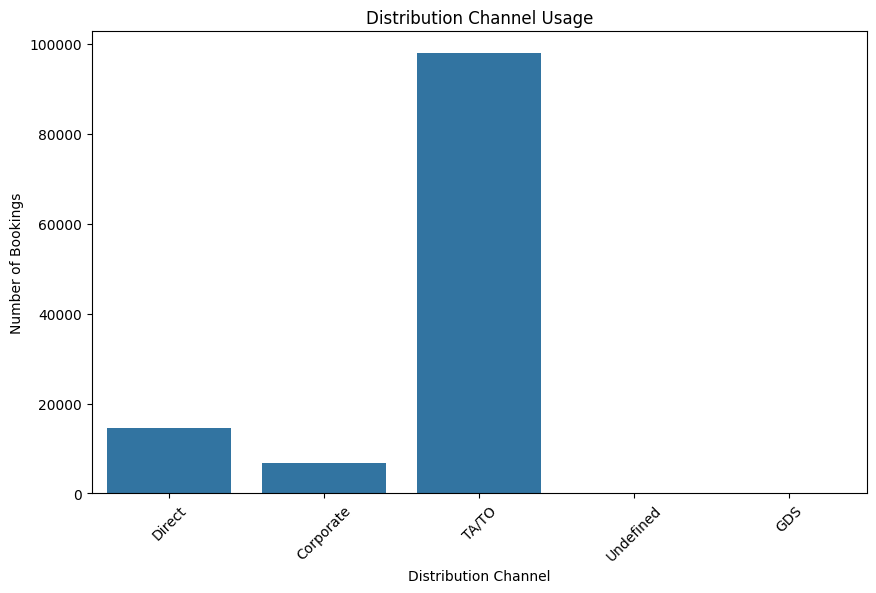

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=dataset)
plt.title('Distribution Channel Usage')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### **Kdeplot**

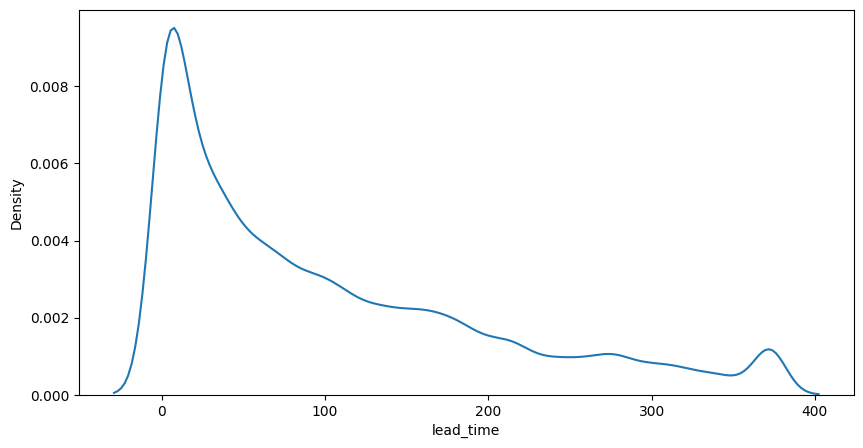

In [105]:
sns.distplot(dataset['lead_time'], hist=False)
plt.show()

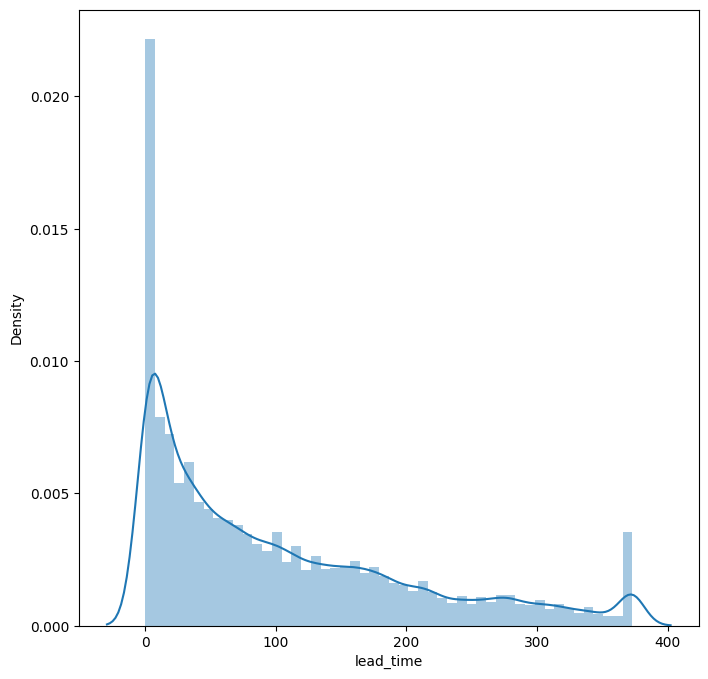

In [106]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['lead_time'])
plt.show()

### **Count plot**

**Booking Status Analysis**

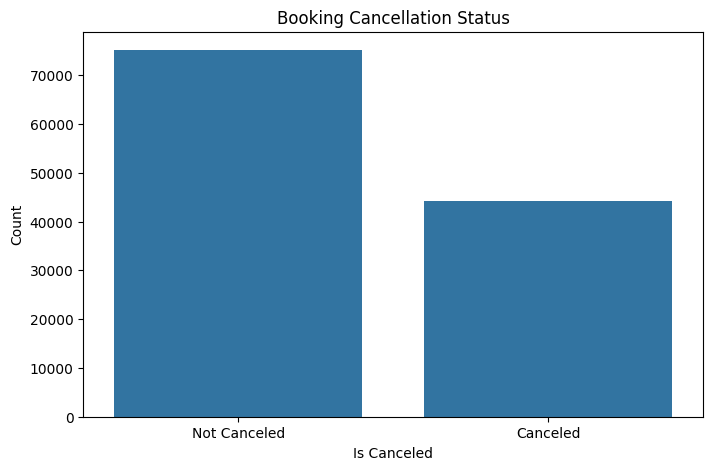

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='is_canceled', data=dataset)
plt.title('Booking Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

### **Histogram**

 **Lead Time Analysis**

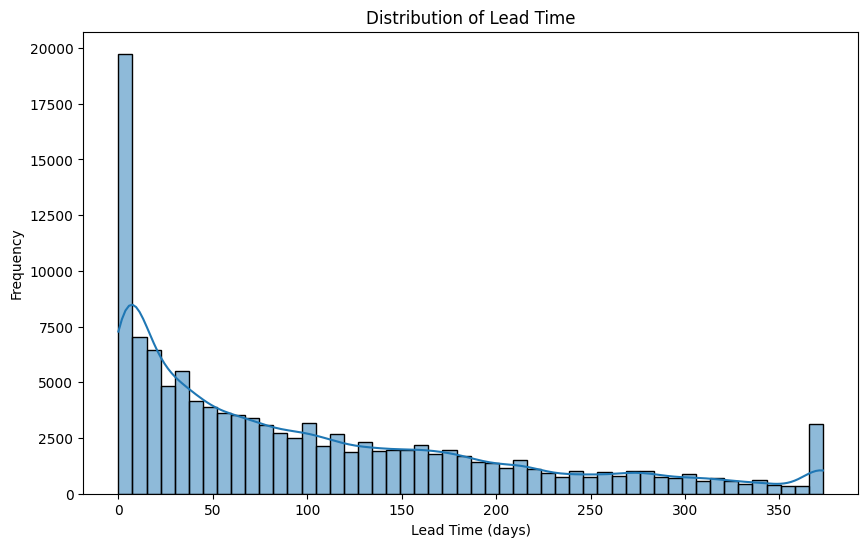

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

### **Line Plot**

**Arrival Date Analysis**

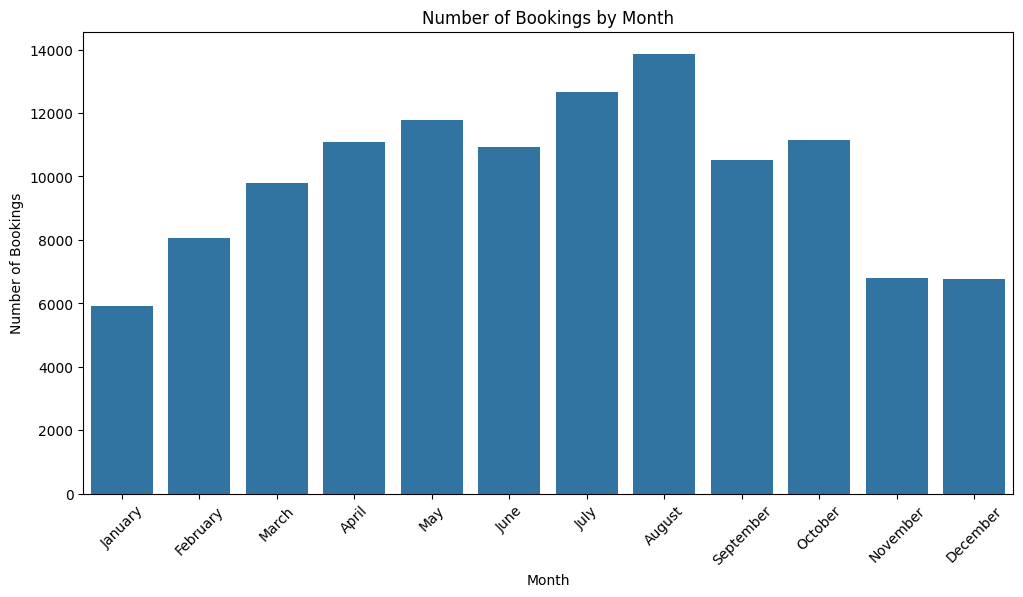

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=dataset, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### **Count Plot**

**Guest Distribution Analysis**

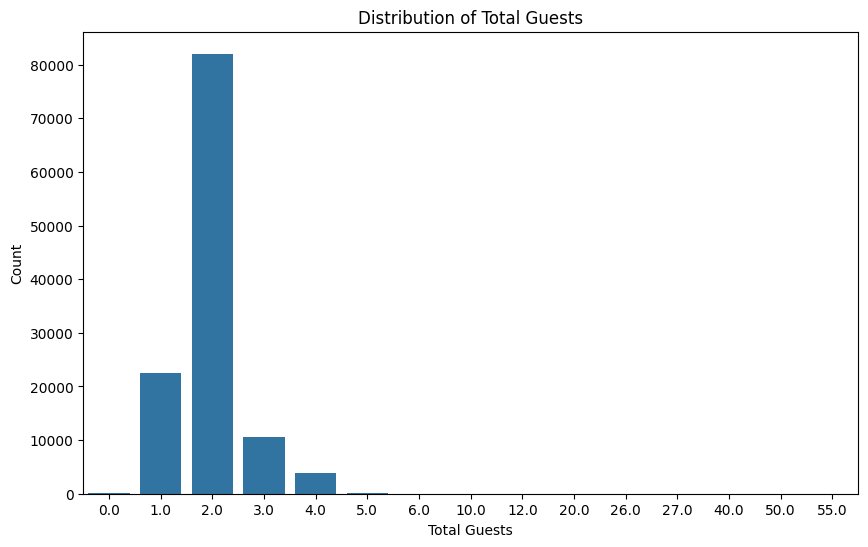

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(x='total_guests', data=dataset)
plt.title('Distribution of Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Count')
plt.show()

### **Market Segment Analysis**

**Pie Chart of market segments**

(-1.0999994243320192,
 1.0999931677330033,
 -1.099999816576563,
 1.0999998552898642)

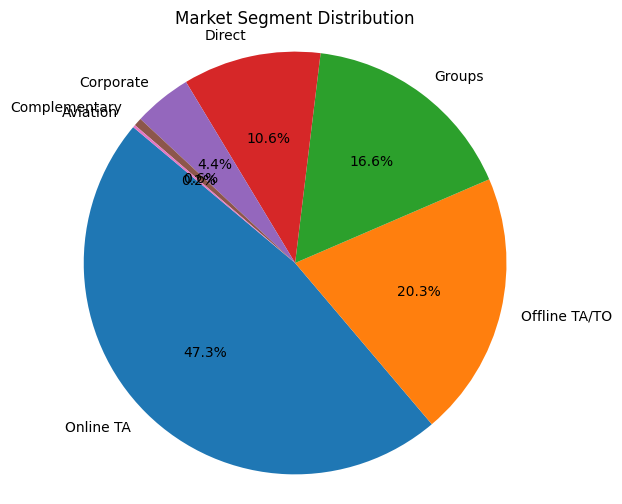

In [113]:
market_segment_counts = dataset['market_segment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(market_segment_counts, labels=market_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Segment Distribution')
plt.axis('equal')

### **Correlation Heatmap**

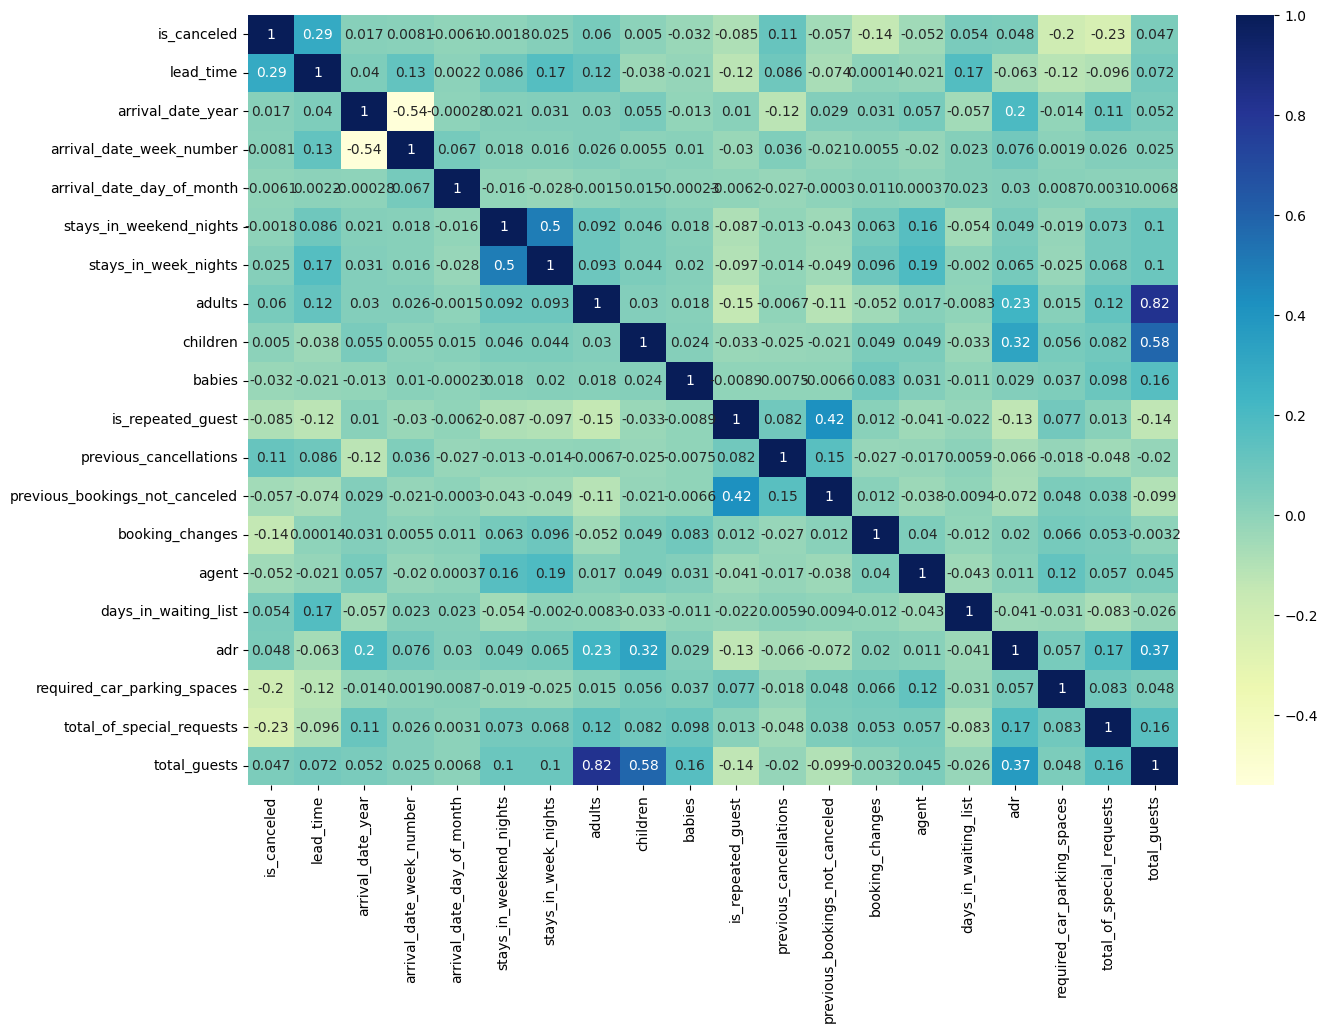

In [101]:
plt.subplots(figsize=(15, 10))
s=data_modified.select_dtypes(include="number").corr()
sns.heatmap(s, cmap = "YlGnBu", annot=True)
plt.show()

### **FaceGrid.Map**

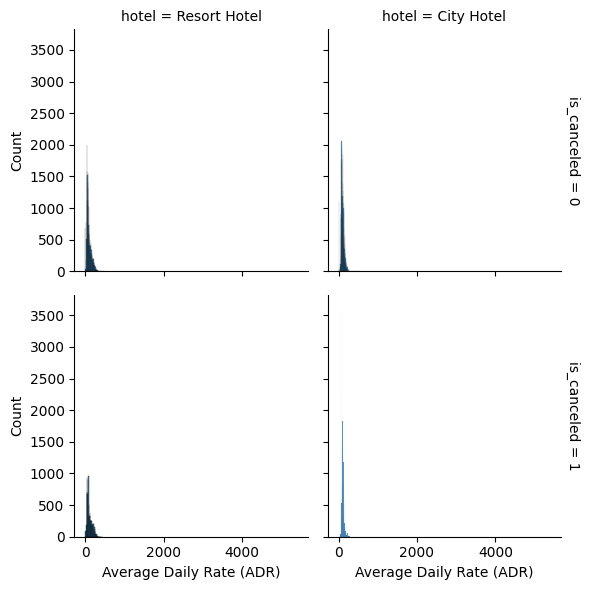

In [122]:
# Creating a FacetGrid
g = sns.FacetGrid(dataset, col="hotel", row="is_canceled", margin_titles=True)
g.map(sns.histplot, "adr")
g.set_axis_labels("Average Daily Rate (ADR)", "Count")
plt.show()